In [298]:
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib  

columns = ['steps','time', 'terminal_index', 'reward', 'time_in_ep']

ws = '/home/user304/navigation2_ws/'

df1 = pd.read_csv(ws + 'results/intersection/dqn/sim1.log', names=columns)
df2 = pd.read_csv(ws + 'results/intersection/dqn/sim2.log', names=columns)
df3 = pd.read_csv(ws + 'simulation_logs/simulation_3.log', names=columns) 
df4 = pd.read_csv(ws + 'results/20260107/dqn/sim1.log', names=columns)

r_count1 = 8
r_count2 = 5
r_count3 = 8
r_count4 = 10

df1['steps'] = df1['steps'] * r_count1
df2['steps'] = df2['steps'] * r_count2
df3['steps'] = df3['steps'] * r_count3
df4['steps'] = df4['steps'] * r_count4
window = 200

status_names = {
        'status_1': '衝突',
        'status_2': 'タイムアウト',
        'status_3': '成功'
    }

/tmp/ipykernel_3188261/2277142612.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


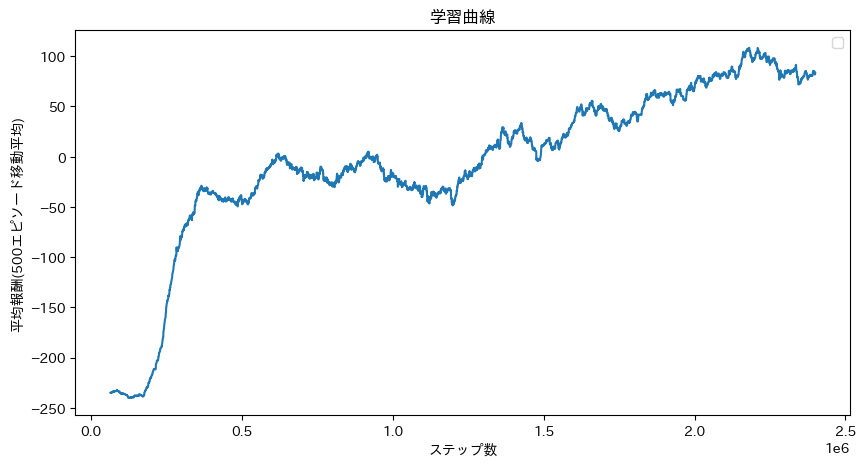

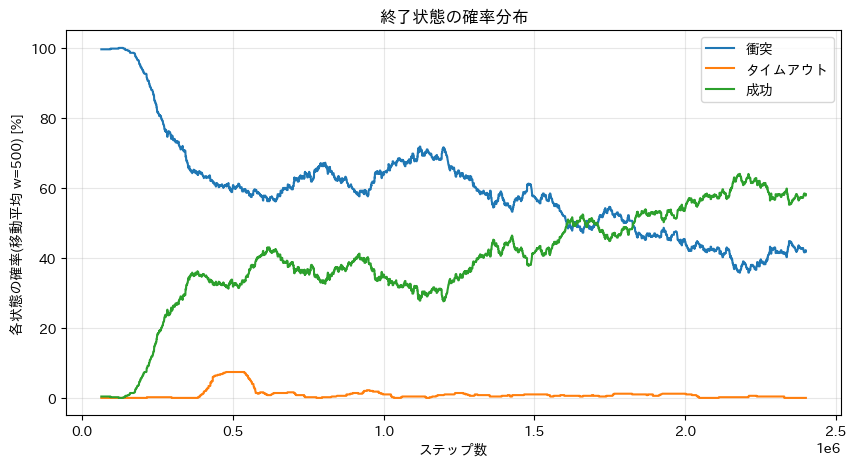

/tmp/ipykernel_3188261/2277142612.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_success['time_in_ep_ma'] = df1_success['time_in_ep'].rolling(window=2000).mean()
/tmp/ipykernel_3188261/2277142612.py:43: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


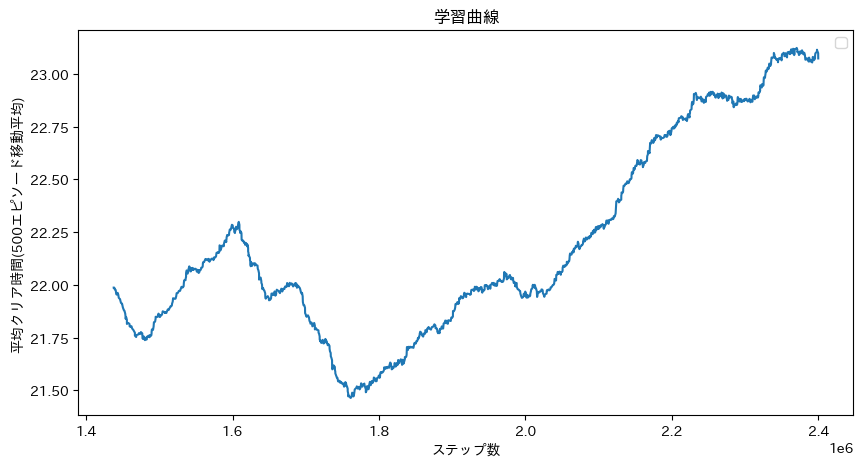

In [186]:
# 移動平均の計算（ウィンドウサイズ50）
df1['reward_ma'] = df1['reward'].rolling(window=window).mean()

plt.figure(figsize=(10, 5))
plt.plot(df1['steps'], df1['reward_ma']) # 移動平均
plt.xlabel('ステップ数')
plt.ylabel(f'平均報酬({window}エピソード移動平均)')
plt.title('学習曲線')
plt.legend()
plt.show()

### ==================================================================== ###

status_dummies1 = pd.get_dummies(df1['terminal_index'], prefix='status')
temp_df1 = pd.concat([df1, status_dummies1], axis=1)

status_cols1 = [col for col in temp_df1.columns if col in status_names]
    
status_ma1 = temp_df1[status_cols1].rolling(window=window).mean() * 100

plt.figure(figsize=(10, 5))
for col in status_cols1:
    label_name = status_names.get(col, col)
    plt.plot(temp_df1['steps'], status_ma1[col], label=label_name)
plt.title(f'終了状態の確率分布')
plt.xlabel('ステップ数')
plt.ylabel(f'各状態の確率(移動平均 w={window}) [%]')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### ==================================================================== ###

df1_success = df1[df1['terminal_index'] == 3]

df1_success['time_in_ep_ma'] = df1_success['time_in_ep'].rolling(window=2000).mean()

plt.figure(figsize=(10, 5))
plt.plot(df1_success['steps'], df1_success['time_in_ep_ma']) # 移動平均
plt.xlabel('ステップ数')
plt.ylabel(f'平均クリア時間({window}エピソード移動平均)')
plt.title('学習曲線')
plt.legend()
plt.show()


/tmp/ipykernel_3188261/2394289069.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


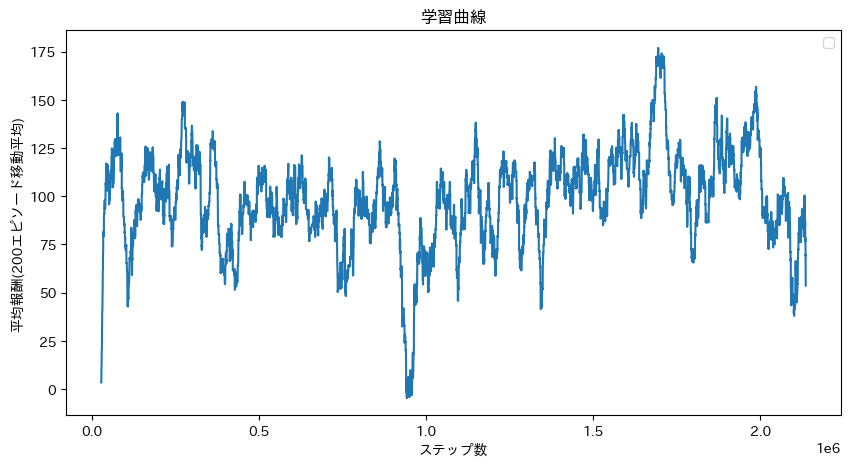

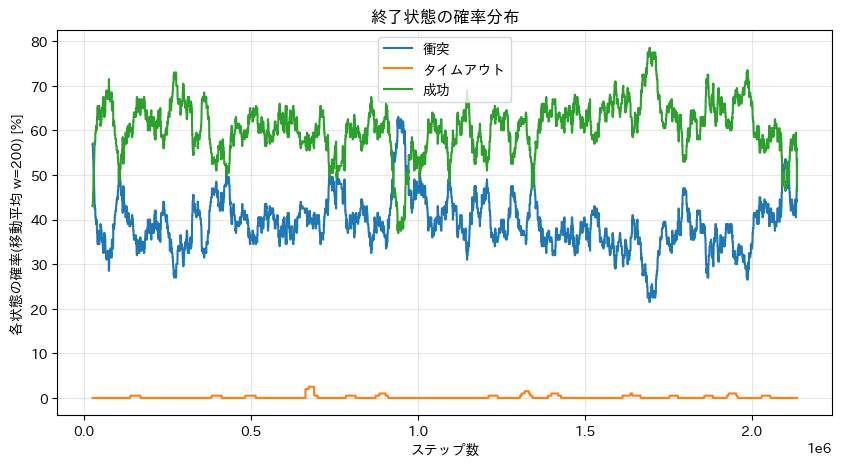

/tmp/ipykernel_3188261/2394289069.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_success['time_in_ep_ma'] = df2_success['time_in_ep'].rolling(window=2000).mean()
/tmp/ipykernel_3188261/2394289069.py:43: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


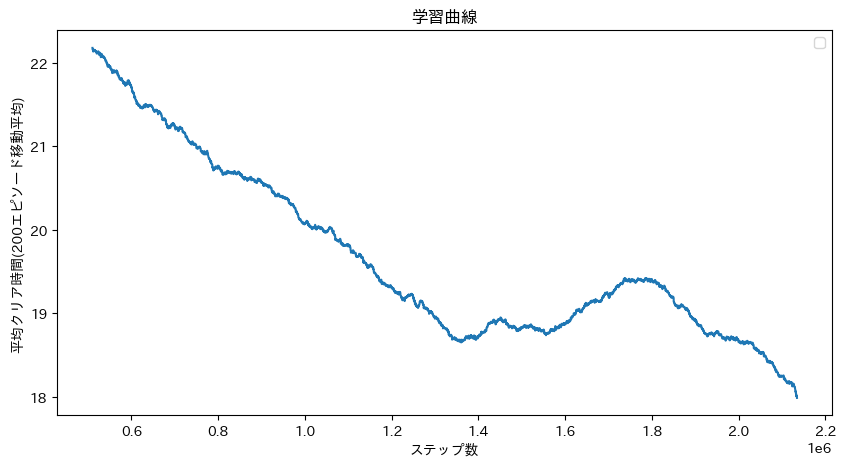

In [285]:
# 移動平均の計算（ウィンドウサイズ50）
df2['reward_ma'] = df2['reward'].rolling(window=window).mean()

plt.figure(figsize=(10, 5))
plt.plot(df2['steps'], df2['reward_ma']) # 移動平均
plt.xlabel('ステップ数')
plt.ylabel(f'平均報酬({window}エピソード移動平均)')
plt.title('学習曲線')
plt.legend()
plt.show()

### ==================================================================== ###

status_dummies2 = pd.get_dummies(df2['terminal_index'], prefix='status')
temp_df2 = pd.concat([df2, status_dummies2], axis=1)

status_cols2 = [col for col in temp_df2.columns if col in status_names]
    
status_ma2 = temp_df2[status_cols2].rolling(window=window).mean() * 100

plt.figure(figsize=(10, 5))
for col in status_cols2:
    label_name = status_names.get(col, col)
    plt.plot(temp_df2['steps'], status_ma2[col], label=label_name)
plt.title(f'終了状態の確率分布')
plt.xlabel('ステップ数')
plt.ylabel(f'各状態の確率(移動平均 w={window}) [%]')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### ==================================================================== ###

df2_success = df2[df2['terminal_index'] == 3]

df2_success['time_in_ep_ma'] = df2_success['time_in_ep'].rolling(window=2000).mean()

plt.figure(figsize=(10, 5))
plt.plot(df2_success['steps'], df2_success['time_in_ep_ma']) # 移動平均
plt.xlabel('ステップ数')
plt.ylabel(f'平均クリア時間({window}エピソード移動平均)')
plt.title('学習曲線')
plt.legend()
plt.show()


/tmp/ipykernel_3188261/1592589858.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


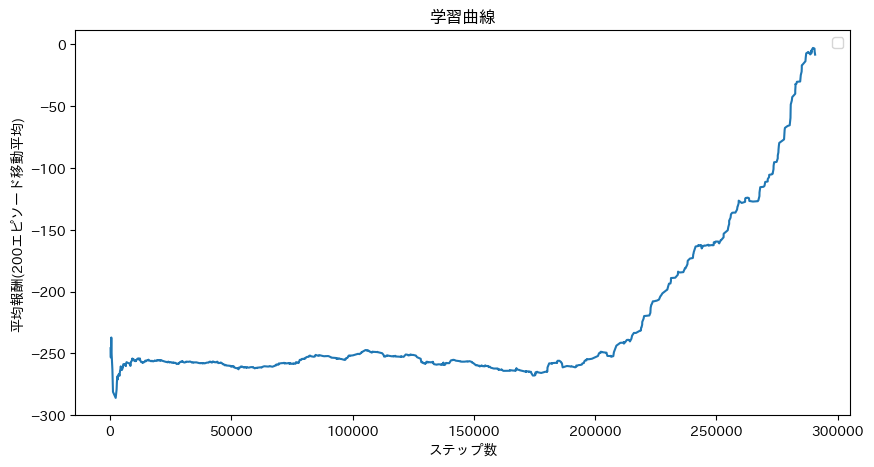

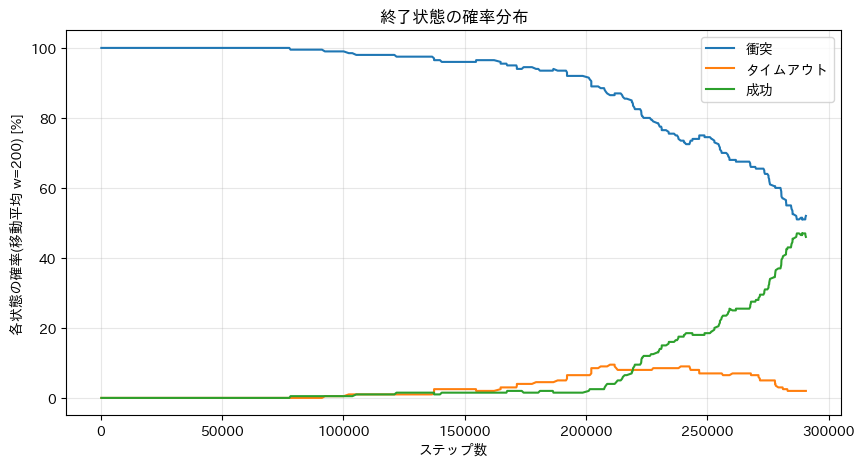

/tmp/ipykernel_3188261/1592589858.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3_success['time_in_ep_ma'] = df3_success['time_in_ep'].rolling(window=window, min_periods=1).mean()
/tmp/ipykernel_3188261/1592589858.py:43: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


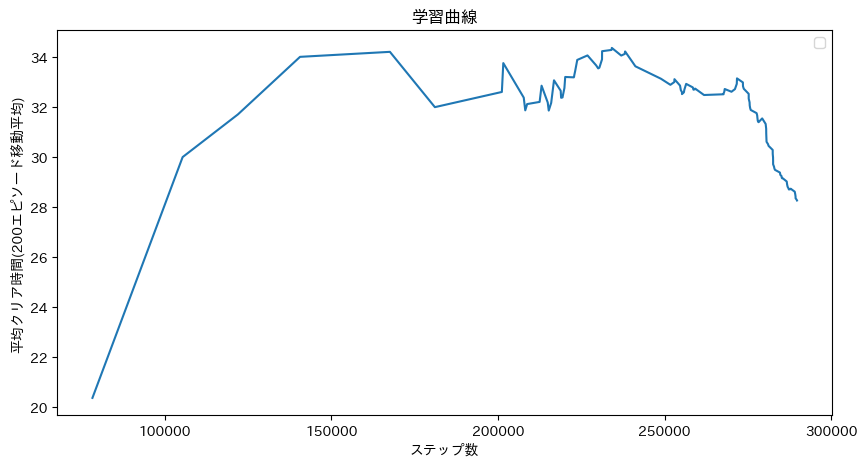

In [299]:
# 移動平均の計算（ウィンドウサイズ50）
df3['reward_ma'] = df3['reward'].rolling(window=window, min_periods=1).mean()

plt.figure(figsize=(10, 5))
plt.plot(df3['steps'], df3['reward_ma']) # 移動平均
plt.xlabel('ステップ数')
plt.ylabel(f'平均報酬({window}エピソード移動平均)')
plt.title('学習曲線')
plt.legend()
plt.show()

### ==================================================================== ###

status_dummies3 = pd.get_dummies(df3['terminal_index'], prefix='status')
temp_df3 = pd.concat([df3, status_dummies3], axis=1)

status_cols3 = [col for col in temp_df3.columns if col in status_names]
    
status_ma3 = temp_df3[status_cols3].rolling(window=window, min_periods=1).mean() * 100

plt.figure(figsize=(10, 5))
for col in status_cols3:
    label_name = status_names.get(col, col)
    plt.plot(temp_df3['steps'], status_ma3[col], label=label_name)
plt.title(f'終了状態の確率分布')
plt.xlabel('ステップ数')
plt.ylabel(f'各状態の確率(移動平均 w={window}) [%]')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### ==================================================================== ###

df3_success = df3[df3['terminal_index'] == 3]

df3_success['time_in_ep_ma'] = df3_success['time_in_ep'].rolling(window=window, min_periods=1).mean()

plt.figure(figsize=(10, 5))
plt.plot(df3_success['steps'], df3_success['time_in_ep_ma']) # 移動平均
plt.xlabel('ステップ数')
plt.ylabel(f'平均クリア時間({window}エピソード移動平均)')
plt.title('学習曲線')
plt.legend()
plt.show()


/tmp/ipykernel_3188261/1113254324.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


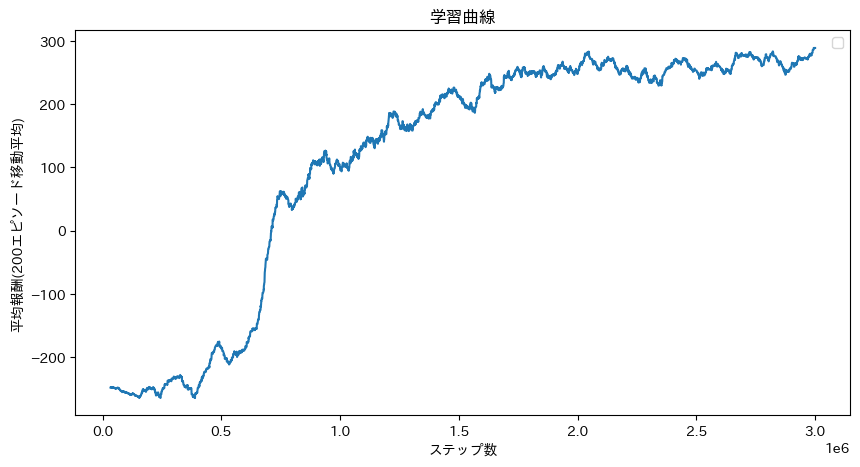

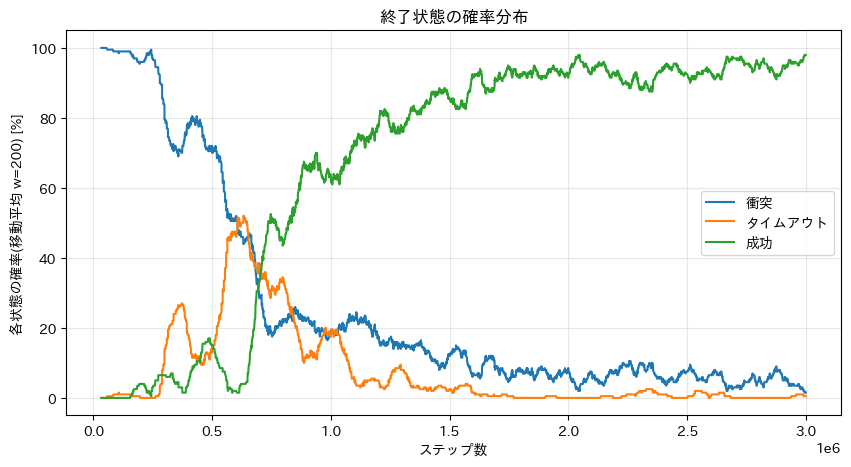

/tmp/ipykernel_3188261/1113254324.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4_success['time_in_ep_ma'] = df4_success['time_in_ep'].rolling(window=2000).mean()
/tmp/ipykernel_3188261/1113254324.py:43: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


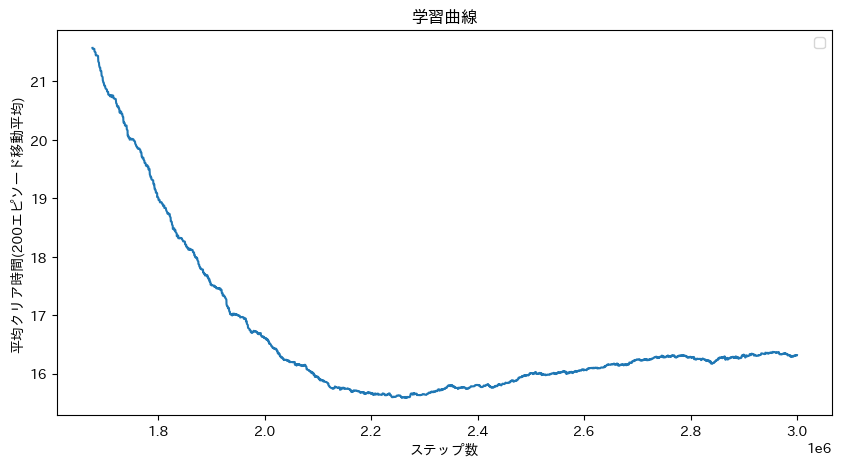

In [297]:
# 移動平均の計算（ウィンドウサイズ50）
df4['reward_ma'] = df4['reward'].rolling(window=window).mean()

plt.figure(figsize=(10, 5))
plt.plot(df4['steps'], df4['reward_ma']) # 移動平均
plt.xlabel('ステップ数')
plt.ylabel(f'平均報酬({window}エピソード移動平均)')
plt.title('学習曲線')
plt.legend()
plt.show()

### ==================================================================== ###

status_dummies4 = pd.get_dummies(df4['terminal_index'], prefix='status')
temp_df4 = pd.concat([df4, status_dummies4], axis=1)

status_cols4 = [col for col in temp_df4.columns if col in status_names]
    
status_ma4 = temp_df4[status_cols4].rolling(window=window).mean() * 100

plt.figure(figsize=(10, 5))
for col in status_cols4:
    label_name = status_names.get(col, col)
    plt.plot(temp_df4['steps'], status_ma4[col], label=label_name)
plt.title(f'終了状態の確率分布')
plt.xlabel('ステップ数')
plt.ylabel(f'各状態の確率(移動平均 w={window}) [%]')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### ==================================================================== ###

df4_success = df4[df4['terminal_index'] == 3]

df4_success['time_in_ep_ma'] = df4_success['time_in_ep'].rolling(window=2000).mean()

plt.figure(figsize=(10, 5))
plt.plot(df4_success['steps'], df4_success['time_in_ep_ma']) # 移動平均
plt.xlabel('ステップ数')
plt.ylabel(f'平均クリア時間({window}エピソード移動平均)')
plt.title('学習曲線')
plt.legend()
plt.show()


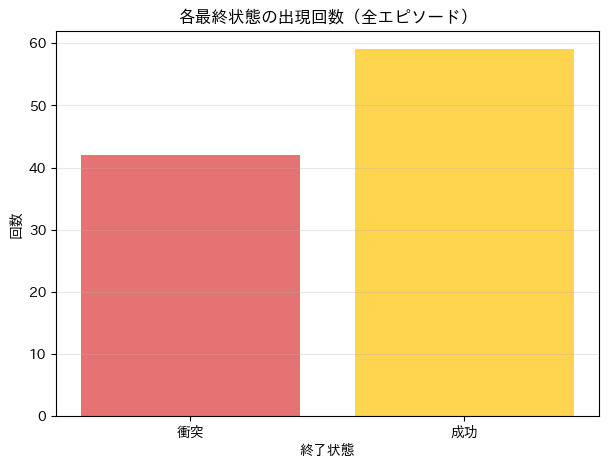

In [170]:
# 各最終状態（terminal_index）の回数を集計して棒グラフで表示
terminal_counts = df1['terminal_index'].value_counts().sort_index()
labels = [status_names.get(f'status_{int(idx)}', str(idx)) for idx in terminal_counts.index]
plt.figure(figsize=(7,5))
plt.bar(labels, terminal_counts.values, color=['#e57373','#ffd54f','#81c784'])
plt.xlabel('終了状態')
plt.ylabel('回数')
plt.title('各最終状態の出現回数（全エピソード）')
plt.grid(axis='y', alpha=0.3)
plt.show()